# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

x = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [181]:
x.shape

(10,)

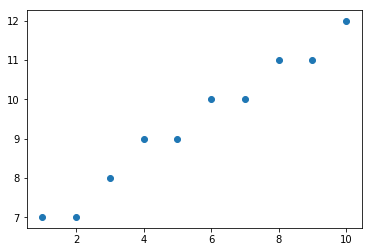

In [5]:
plt.scatter(x, y)

In [206]:
def slope(x,y):
    a = np.mean(x) * np.mean(y)
    b = a - np.mean(x*y)
    c = np.mean(x)**2 - np.mean(x**2)
    d = b/c
    return d

def intercept(x1,y1):
    a = slope(x1,y1)
    b = np.mean(y1) -  a * np.mean(x1)
    b = np.array(b)
    return b

def sqr_err(x2,y2):
    a = np.subtract(x2,y2)
    b = np.sum(a**2)
    return b

def reg_lin(s, i, x):
    a = np.multiply(s,x)
    y = np.add(a,i)
    y = np.array(y)
    return y

def r2(rline,y3):
    rss = sqr_err(y3, rline)
    tss = sqr_err(y3, np.mean(y3))
    e = 1 - rss/tss
    return e



In [209]:
slope = slope(x,y)
slope

0.5575757575757568

In [208]:
yintercept = intercept(x,y)
type(yintercept)
yintercept

array(6.33333333)

In [207]:
rline = reg_lin(slope(x,y), intercept(x,y), x)
rline

array([ 6.89090909,  7.44848485,  8.00606061,  8.56363636,  9.12121212,
        9.67878788, 10.23636364, 10.79393939, 11.35151515, 11.90909091])

In [210]:
rsquared = r2(rline,y)
type(rsquared)
rsquared

0.9715335169880626

In [211]:
print ('Slope: ' + str(slope))
print ('Y-Intercept: ' + str(yintercept))
print ('R-Squared: ' + str(rsquared))
print ('Model: Y = {} * X + {}'.format(slope, yintercept))

Slope: 0.5575757575757568
Y-Intercept: 6.3333333333333375
R-Squared: 0.9715335169880626
Model: Y = 0.5575757575757568 * X + 6.3333333333333375


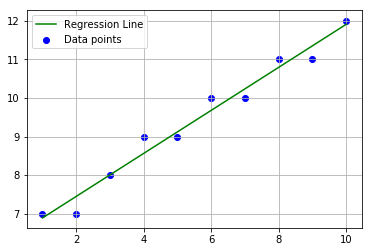

In [136]:
plt.scatter(x,y, label='Data points', color='blue')
plt.plot(x, rline, label='Regression Line', color='green')
plt.grid()
plt.legend()
plt.show()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


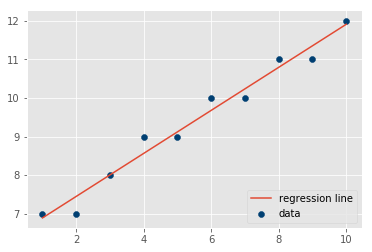

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [137]:
# Make prediction using given value and visualize on the scatter plot
new = 4.5
new_p = slope * new + yintercept
new_p

8.842424242424244

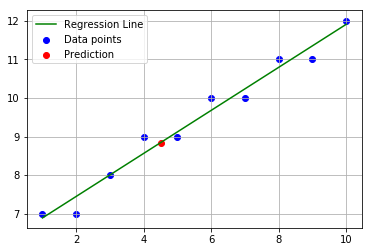

In [138]:
plt.scatter(x,y, label='Data points', color='blue')
plt.plot(x, rline, label='Regression Line', color='green')
plt.scatter(new, new_p, color='red', label='Prediction')
plt.grid()
plt.legend()
plt.show()

In [139]:
df = pd.read_csv('heightWeight.csv')

In [140]:
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [143]:
r_line2 = reg_lin(slope(df.height,df.weight), intercept(df.height,df.weight), df.height)

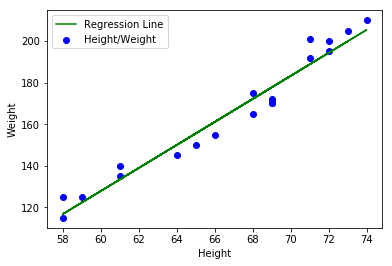

In [144]:
plt.scatter(df.height, df.weight, label='Height/Weight', color='blue')
plt.plot(df.height, r_line2, label='Regression Line', color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [198]:
rsquared2 = r2(r_line2, df.weight)
rsquared2

0.9553099288673668

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 